<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import datetime

print(f" TF version : {tf.__version__}")
print(f" Last known execution of the notebook : {datetime.datetime.now()}")

 TF version : 2.12.0
 Last known execution of the notebook : 2023-06-25 22:11:17.898644


Steps in modelling with Tensorflow
1. **Creating a model**: Piece together the layers of a neural network yourself or import a previously built model (known as Transfer Learning ).
2. **Compiling a model** : defining how a models performance should be measured( loss/metrics) as well as defining how it can be improved(optimizer).
3. **Fitting a model** : letting the model try to find patterns in the data.

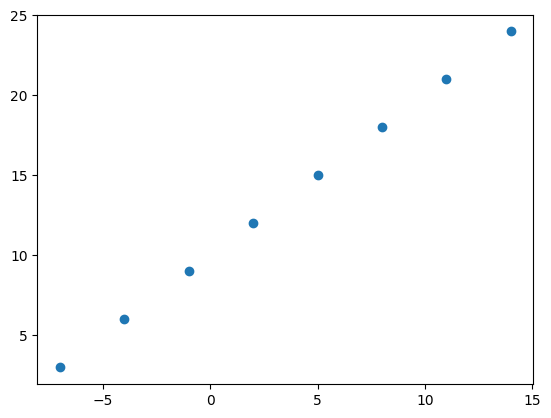

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features ( using tensors )
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels ( using tensors)
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [9]:
# Set random seed
tf.random.set_seed(42)

#1. creating the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2. Compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer = tf.keras.optimizers.SGD()
              ,metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 646ms/step - loss: 20.2900 - mae: 20.2900
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 20.0088 - mae: 20.0088
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 19.7275 - mae: 19.7275
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 19.4463 - mae: 19.4463
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 19.1650 - mae: 19.1650


In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 436ms/step


array([[-19.915308]], dtype=float32)

Steps to improving the model
1. _Creating a model_ : Here we might want to add more layers, increase the number of hidden units, change the activation function in each layer.
2. _Compiling a model_: We might want to choose a different optimizer or change the **learning rate** of the optimization function
3. _Fitting a model_ : we could also try fit the model for more **epochs**

_There are many different ways to improve a neural network. Some of the most common include : increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are human-changeable, they are referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter-tuning_

In [12]:
# Lets try to improve our model by training it a little longer
# set seeds
tf.random.set_seed(42)

#1.Create the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
model.compile (loss= tf.keras.losses.mae
               ,optimizer = tf.keras.optimizers.SGD()
               ,metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 9.6808 - mae: 9.6808
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5483 - mae: 9.5483
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4158 - mae: 9.4158
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2833 - mae: 9.2833
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1508 - mae: 9.1508
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0183 - mae: 9.0183
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8858 - mae: 8.8858
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7533 - mae: 8.7533
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6208 - mae: 8.6208
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4883 - mae: 8.4883
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 242ms/step


array([[30.055235]], dtype=float32)